In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [24]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [26]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [27]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [28]:
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)


In [14]:
classes[y_train[20]]

'Dress'

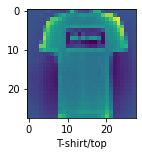

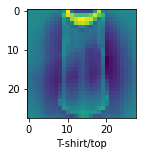

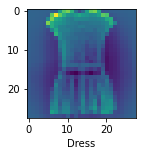

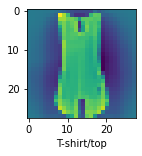

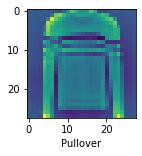

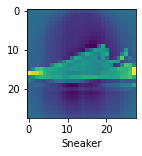

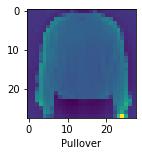

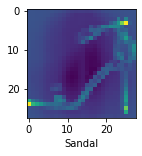

In [29]:
for i in range(1, 9):
    plot_sample(X_train, y_train, i)

In [21]:
X_train[0].shape

(28, 28)

In [30]:
from functools import partial

DefaultConv2D = partial(layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    layers.MaxPooling2D((2, 2)),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D((2, 2)),
    DefaultConv2D(filters=256),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.7774 - accuracy: 0.7239
Epoch 2/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.4568 - accuracy: 0.8489
Epoch 3/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.3995 - accuracy: 0.8680
Epoch 4/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.3674 - accuracy: 0.8795
Epoch 5/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.3401 - accuracy: 0.8861


In [35]:
cnn_pred = model.predict(X_test)
cnn_pred_classes = [np.argmax(ele) for ele in cnn_pred]

print("Classification \n ", classification_report(y_test, cnn_pred_classes))

Classification 
                precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.86      0.83      1000
           3       0.89      0.91      0.90      1000
           4       0.78      0.85      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.57      0.65      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [34]:
print(np.argmax(cnn_pred[1]), y_test[0])

9 9
